In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
mnist = keras.datasets.mnist

In [5]:
# mnist 데이터를 로드, 다운로드하지 않았다면 다운로드까지 자동으로 진행

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(len(x_train))

60000


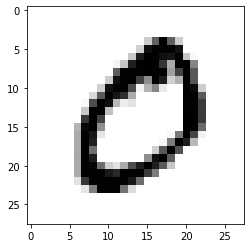

In [8]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[1])

0


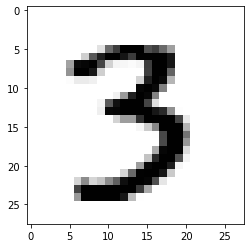

10001 번째 이미지의 숫자는 바로 3 입니다.


In [10]:
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로' , y_train[index], '입니다.')

In [11]:
print(x_train.shape)

(60000, 28, 28)


In [12]:
print(x_test.shape)

(10000, 28, 28)


In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0


In [15]:
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


In [16]:
model=keras.models.Sequential()

In [17]:
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(28,28,1)))

In [18]:
model.add(keras.layers.MaxPool2D(2,2))

In [19]:
model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))

In [20]:
model.add(keras.layers.MaxPool2D((2,2)))

In [21]:
model.add(keras.layers.Flatten())

In [22]:
model.add(keras.layers.Dense(32, activation='relu'))

In [23]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [25]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)


In [26]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

Before Reshape - x_test_norm shape: (10000, 28, 28)


In [27]:
x_train_reshaped=x_train_norm.reshape(-1,28,28,1)

In [28]:
x_test_reshaped=x_test_norm.reshape(-1,28,28,1)

In [29]:
# 데이터갯수에 -1을 쓰면 reshape시 자동계산된다.

In [30]:
print("After Reshape = x_train_reshaped shape: {}".format(x_train_reshaped.shape))

After Reshape = x_train_reshaped shape: (60000, 28, 28, 1)


In [31]:
print("After Reshape = x_test_reshaped shape: {}".format(x_test_reshaped.shape))

After Reshape = x_test_reshaped shape: (10000, 28, 28, 1)


In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1911 - accuracy: 0.9437
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0596 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0435 - accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0282 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [33]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

313/313 - 1s - loss: 0.0343 - accuracy: 0.9899


In [34]:
print("test_loss: {}".format(test_loss))

test_loss: 0.03425091132521629


In [35]:
print("test_accuracy: {}".format(test_accuracy))

test_accuracy: 0.9898999929428101


In [36]:
predicted_result = model.predict(x_test_reshaped) #model이 추론한 확률값.

In [37]:
predicted_labels = np.argmax(predicted_result, axis=1)

In [38]:
idx=0

In [39]:
print('model.predict() 결과 : ', predicted_result[idx])

model.predict() 결과 :  [4.5474936e-14 4.1165701e-10 1.0769638e-08 3.1093457e-08 1.5845726e-09
 2.9949201e-12 3.3454387e-18 9.9999976e-01 2.7603855e-09 2.3267444e-07]


In [40]:
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])

model이 추론한 가장 가능성이 높은 결과 :  7


In [41]:
print('실제 데이터의 라벨 : ', y_test[idx])

실제 데이터의 라벨 :  7


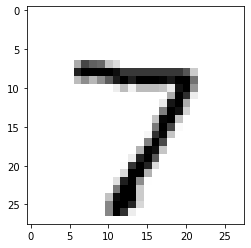

In [42]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [43]:
import random

In [44]:
wrong_predict_list=[]

In [45]:
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

In [46]:
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.

In [47]:
samples = random.choices(population=wrong_predict_list, k=5)

예측확률분포: [1.7634789e-19 7.9120283e-10 1.3397726e-13 1.9474963e-03 3.3614316e-12
 9.9803668e-01 6.2766065e-15 2.7474703e-11 1.5860356e-05 3.9645873e-09]
라벨: 3, 예측결과: 5


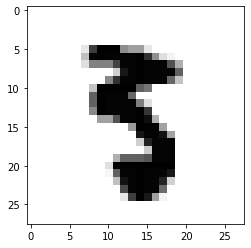

예측확률분포: [1.8035726e-05 1.3269739e-03 1.1849917e-02 3.9220348e-07 4.8155907e-01
 4.6130907e-02 4.5792696e-01 1.1532264e-03 3.2081502e-05 2.5716809e-06]
라벨: 6, 예측결과: 4


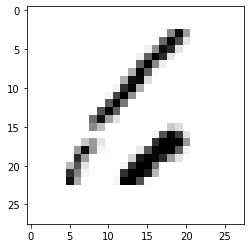

예측확률분포: [6.8259398e-11 4.3239418e-12 1.6838837e-10 8.4801385e-08 1.8967540e-03
 4.3840065e-09 2.9955571e-13 1.1119745e-08 1.7515517e-06 9.9810141e-01]
라벨: 4, 예측결과: 9


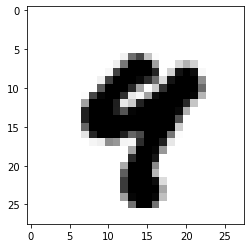

예측확률분포: [3.2071932e-11 3.8287437e-12 1.4217828e-08 7.3502218e-07 2.1418543e-10
 2.9847610e-07 2.0381795e-12 4.1171242e-07 1.4929980e-01 8.5069877e-01]
라벨: 8, 예측결과: 9


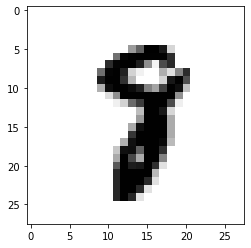

예측확률분포: [3.0991505e-04 1.8715860e-13 2.6275019e-08 9.0860041e-08 2.5139735e-09
 3.4982897e-04 9.9882561e-01 3.8432291e-12 5.1455596e-04 1.1850479e-10]
라벨: 5, 예측결과: 6


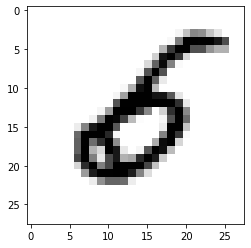

In [48]:
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [49]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10
model=keras.models.Sequential()

In [50]:
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=
(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [51]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [52]:
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1997 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0652 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0486 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0389 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0322 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 18s 10m

In [53]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0425 - accuracy: 0.9884
test_loss: 0.04252833500504494 
test_accuracy: 0.9883999824523926


In [ ]:
# 자 이제 가위바위보 사진을 준비해보자 즉 데이터만들자!
# 그전에 숫자손글씨가 28x28크기였기때문에 PIL라이브러리를 사용해서 동등하게 맞춰주자!없으면 설

In [55]:
!pip install pillow

In [56]:
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")


PIL 라이브러리 import 완료!


In [60]:
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

In [67]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="C:/Users/User/Desktop/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  C:/Users/User/Desktop/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [64]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="C:\\Users\\User\\Desktop\\rock_scissor_paper\\rock"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("바위 이미지 resize 완료!")


이미지 디렉토리 경로:  C:\Users\User\Desktop\rock_scissor_paper\rock
바위 이미지 resize 완료!


In [65]:

image_dir_path = ("C:/Users/User/Desktop/rock_scissor_paper/paper")
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.jpg")
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("보자기 이미지 resize 완료!")


이미지 디렉토리 경로:  C:/Users/User/Desktop/rock_scissor_paper/paper
보자기 이미지 resize 완료!


In [ ]:
#for 문 활용, 한번에 resize 하는 방법
#ModelPic 폴더 아래의 /Rock, /Paper, /Scissor 아래에 가위바위보 사진이 라벨별로 들어
#가있으므로,
#한번에 리사이징할 수 있도록 코드를 변경한다
#image_directory =
#os.getenv("HOME")+"/SUBMIT_MISSION_GIT/ex1_RPC/ModelPic"
#path_pool = "/Rock", "/Scissor", "/Paper"
#target_size=(28, 28)
#for path in path_pool:
#images=glob.glob(image_directory + path + "/*.jpg")
#for img in images:
#old_img=Image.open(img)
#new_img=old_img.resize(target_size, Image.ANTIALIAS
#new_img.save(img, "JPEG")
#print("리사이징 완료)

In [77]:
def load_data(img_path):
# 가위 : 0 바위: 1 보 : 2
    number_of_data=300
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    
    for file in glob.iglob('C:/Users/User/Desktop/rock_scissor_paper/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1
    for file in  glob.iglob('C:\\Users\\User\\Desktop\\rock_scissor_paper\\rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위 : 1
        idx=idx+1
    for file in glob.iglob('C:/Users/User/Desktop/rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

In [78]:
image_dir_path ="C:/Users/User/Desktop/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


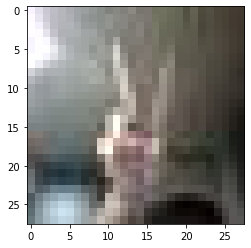

In [79]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
라벨: 0